# Korelasi Cuaca dengan Kualitas Udara

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'ready-merge.csv'
data = pd.read_csv(file_path)

data.head()

,kota,jamCuaca,kodeCuaca,humidity,tempC,tempF,iqa,wind_dir_deg,wind_spd_km_h,pressure_mbar
0,Ambon,2023-11-20 00:00:00,3,80,29.0,84.0,47,174,7.4,1010
1,Ambon,2023-11-20 06:00:00,3,65,32.0,90.0,52,174,11.1,1011
2,Ambon,2023-11-20 12:00:00,1,80,28.0,82.0,54,174,18.4,1009
3,Ambon,2023-11-20 18:00:00,1,95,24.0,75.0,51,174,12.8,1010
4,Badung,2023-11-20 00:00:00,3,85,28.0,82.0,69,184,3.7,1012


In [34]:
# Jumlah baris menggunakan len()
num_rows = len(data)
print("Jumlah baris:", num_rows)

# Jumlah baris menggunakan .shape
num_rows_shape = data.shape[0]
print("Jumlah baris (shape):", num_rows_shape)


Jumlah baris: 3240
Jumlah baris (shape): 3240


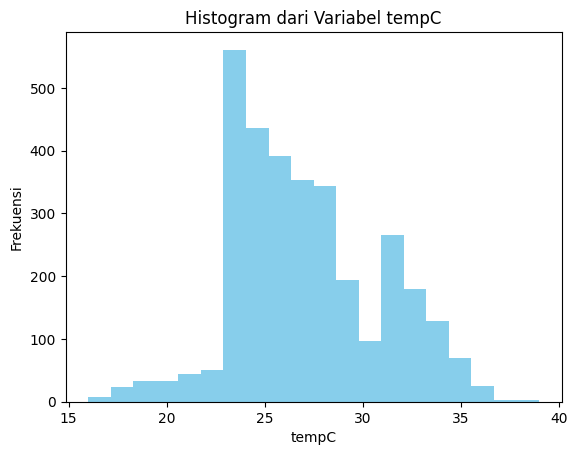

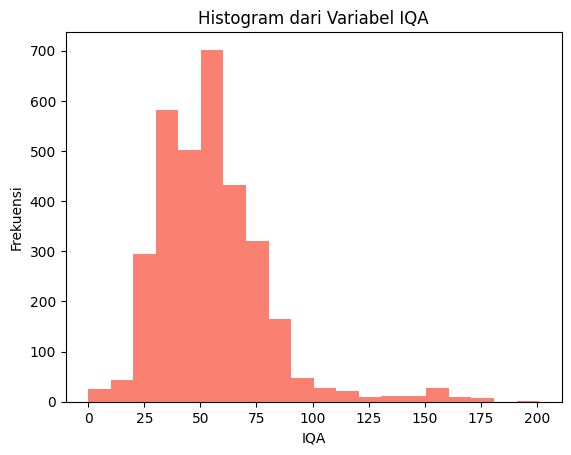

In [35]:
# Histogram untuk variabel 'tempC'
plt.hist(data['tempC'], bins=20, color='skyblue')
plt.title('Histogram dari Variabel tempC')
plt.xlabel('tempC')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk variabel 'iqa'
plt.hist(data['iqa'], bins=20, color='salmon')
plt.title('Histogram dari Variabel IQA')
plt.xlabel('IQA')
plt.ylabel('Frekuensi')
plt.show()


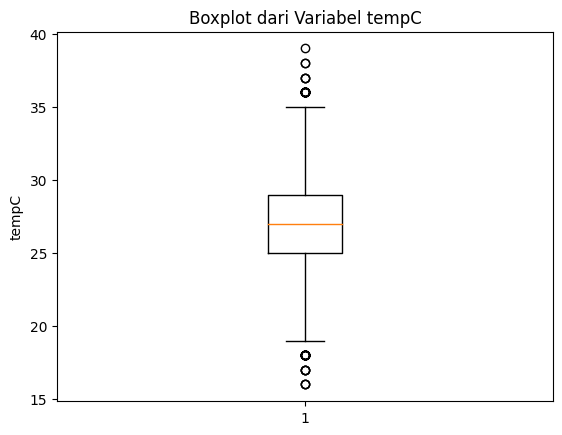

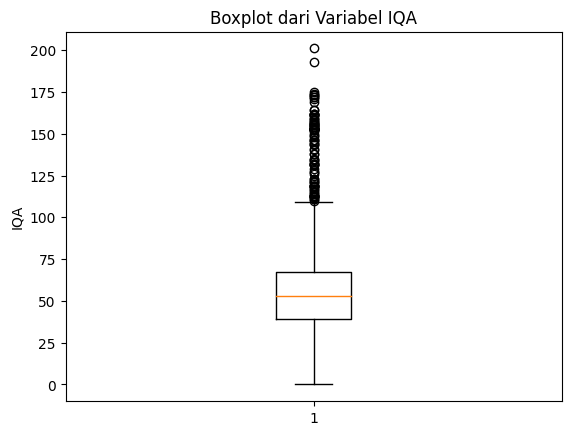

In [36]:
# Boxplot untuk variabel 'tempC'
plt.boxplot(data['tempC'])
plt.title('Boxplot dari Variabel tempC')
plt.ylabel('tempC')
plt.show()

# Boxplot untuk variabel 'iqa'
plt.boxplot(data['iqa'])
plt.title('Boxplot dari Variabel IQA')
plt.ylabel('IQA')
plt.show()


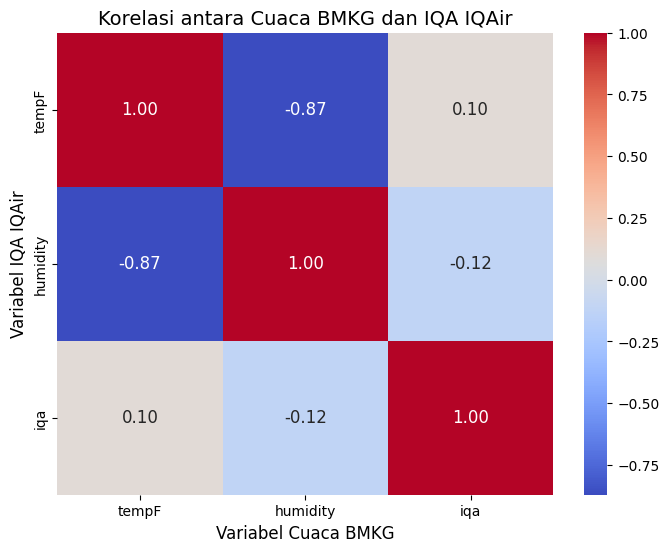

Nilai Korelasi:
             tempF  humidity       iqa
tempF     1.000000 -0.870500  0.096726
humidity -0.870500  1.000000 -0.120226
iqa       0.096726 -0.120226  1.000000


In [37]:
# Menghitung korelasi antara suhu (tempC) dan kelembaban (humidity) dari BMKG dengan IQA dari IQAir
correlation = data[['tempF', 'humidity', 'iqa']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Korelasi antara Cuaca BMKG dan IQA IQAir', fontsize=14)
plt.xlabel('Variabel Cuaca BMKG', fontsize=12)
plt.ylabel('Variabel IQA IQAir', fontsize=12)
plt.show()

# Menampilkan nilai korelasi
print("Nilai Korelasi:")
print(correlation)

In [38]:
from sklearn.model_selection import KFold
import numpy as np

# Misalnya data Anda disimpan dalam variabel 'data' dengan kolom cuaca dan iqa

# Tentukan jumlah lipatan (folds)
k = 5
kf = KFold(n_splits=k, shuffle=True)

correlation_scores = []

for train_index, test_index in kf.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    
    # Lakukan perhitungan korelasi pada setiap lipatan (folds)
    correlation = np.corrcoef(train_data['tempC'], train_data['iqa'])[0, 1]
    correlation_scores.append(correlation)

# Tampilkan hasil korelasi dari setiap lipatan
print(correlation_scores)
# Hitung rata-rata korelasi dari semua lipatan
print(f"Rata-rata korelasi: {np.mean(correlation_scores)}")


[0.08425746096889533, 0.10166133456427301, 0.10171233249798892, 0.09929456213471378, 0.09377017925957808]
Rata-rata korelasi: 0.09613917388508983


### Korelasi Pearson dan Spearman

In [39]:
# Menghitung korelasi Pearson
pearson_corr = data[['tempC', 'humidity', 'iqa']].corr(method='pearson')

# Menghitung korelasi Spearman
spearman_corr = data[['tempC', 'humidity', 'iqa']].corr(method='spearman')

print("Korelasi Pearson:")
print(pearson_corr)
print("\nKorelasi Spearman:")
print(spearman_corr)


Korelasi Pearson:
             tempC  humidity       iqa
tempC     1.000000 -0.871239  0.096093
humidity -0.871239  1.000000 -0.120226
iqa       0.096093 -0.120226  1.000000

Korelasi Spearman:
             tempC  humidity       iqa
tempC     1.000000 -0.874809  0.131463
humidity -0.874809  1.000000 -0.162725
iqa       0.131463 -0.162725  1.000000


### Scatter Plot

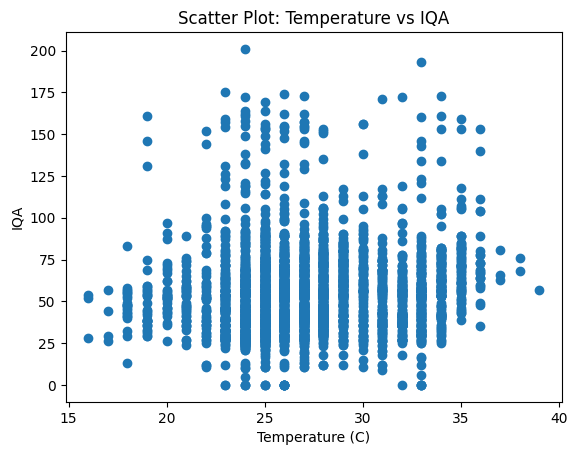

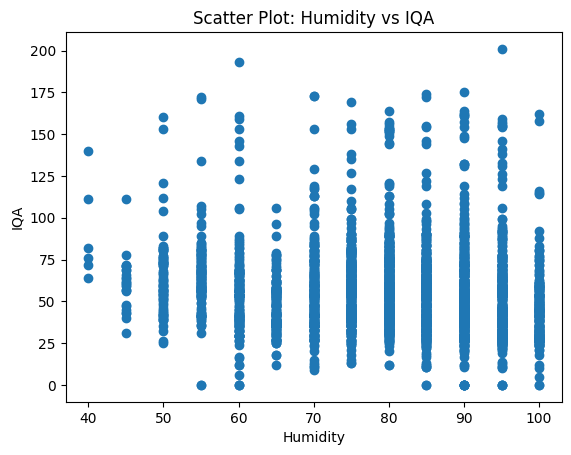

In [40]:
import matplotlib.pyplot as plt

plt.scatter(data['tempC'], data['iqa'])
plt.xlabel('Temperature (C)')
plt.ylabel('IQA')
plt.title('Scatter Plot: Temperature vs IQA')
plt.show()

plt.scatter(data['humidity'], data['iqa'])
plt.xlabel('Humidity')
plt.ylabel('IQA')
plt.title('Scatter Plot: Humidity vs IQA')
plt.show()


### Regresi Linier

In [41]:
from sklearn.linear_model import LinearRegression

# Model regresi untuk memprediksi IQA berdasarkan variabel cuaca
X = data[['tempC', 'humidity']]
y = data['iqa']

regression = LinearRegression()
regression.fit(X, y)

# Koefisien regresi
print("Koefisien Regresi:")
print(regression.coef_)

# Intercept regresi
print("Intercept Regresi:")
print(regression.intercept_)


Koefisien Regresi:
[-0.23529103 -0.27671347]
Intercept Regresi:
83.74810786440571


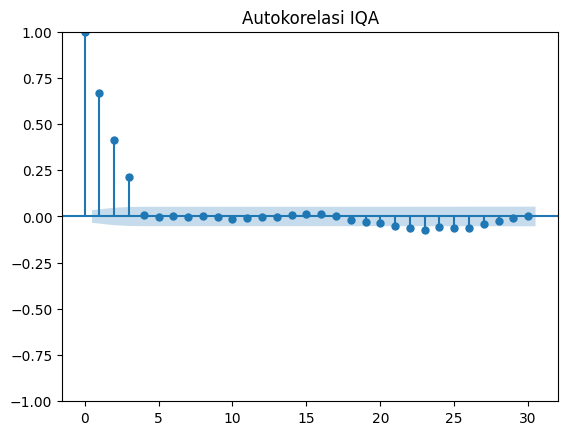

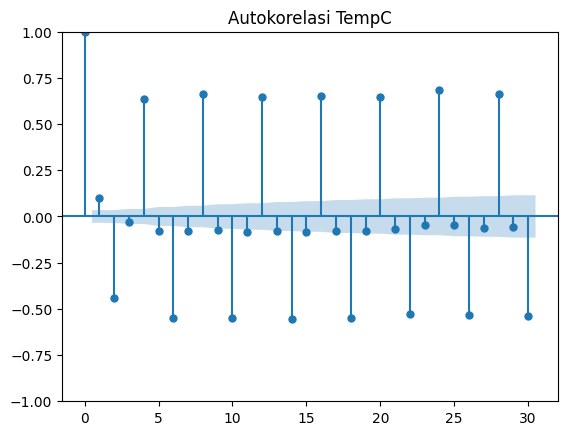

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Ubah kolom jamCuaca menjadi format waktu jika belum
data['jamCuaca'] = pd.to_datetime(data['jamCuaca'])

# Pisahkan data menjadi deret waktu
time_series_iqa = data.set_index('jamCuaca')['iqa']
time_series_tempC = data.set_index('jamCuaca')['tempC']

# Plot autokorelasi untuk iqa
plot_acf(time_series_iqa, lags=30, title='Autokorelasi IQA')
plt.show()

# Plot autokorelasi untuk tempC
plot_acf(time_series_tempC, lags=30, title='Autokorelasi TempC')
plt.show()
